In [28]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import os, sys
sys.path.append('..')
import common, sql
import pandas as pd

In [39]:
q='''select distinct t.name as tool, v.id
from npmAlert nA
join vulnerability v on nA.vulnerabilityId = v.id
join tool t on nA.toolId = t.id
where toolId in (2,4,5)
and v.cveId is not null;'''
fullDf= sql.pd_read_sql(q)

In [42]:
l=[]
tools=[]
for tool, df in fullDf.groupby('tool'):
    tools.append(tool)
    s = set(df.id)
    l.append(s)

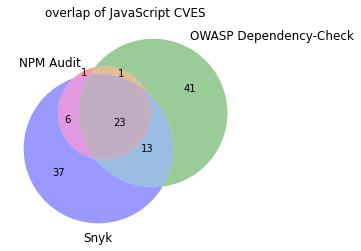

In [43]:
v= venn3(l, set_labels=tools)
plt.title('overlap of JavaScript CVES')
plt.savefig('jscves.png')

In [47]:
q='''select distinct t.name as tool, d.packageId as id
        from npmAlert nA
        join dependency d on nA.dependencyId = d.id
        join tool t on nA.toolId = t.id
        where toolId in (2,4,5);'''
fullDf= sql.pd_read_sql(q)
l=[]
tools = []
for tool, df in fullDf.groupby('tool'):
    tools.append(tool)
    s = set(df.id)
    l.append(s)

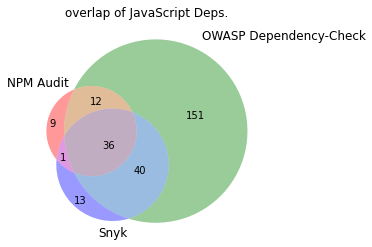

In [50]:
v= venn3(l, set_labels=tools)
plt.title('overlap of JavaScript Deps.')
plt.savefig('jsdeps.png')

In [52]:
q='''select distinct t.name as tool, v.id
    from mavenAlert mA
    join vulnerability v on mA.vulnerabilityId = v.id
    join tool t on mA.toolId = t.id
    where toolId in (2,4,7)
    and v.cveId is not null'''
fullDf= sql.pd_read_sql(q)
l=[]
tools = []
for tool, df in fullDf.groupby('tool'):
    tools.append(tool)
    s = set(df.id)
    l.append(s)

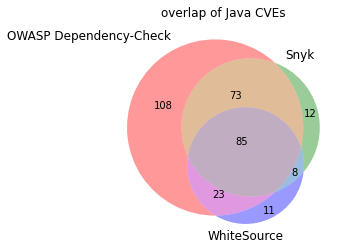

In [54]:
v= venn3(l, set_labels=tools)
plt.title('overlap of Java CVEs')
plt.savefig('javacves.png')

In [55]:
q='''select distinct t.name as tool, d.packageId as id
    from mavenAlert mA
    join dependency d on mA.dependencyId = d.id
    join tool t on mA.toolId = t.id
    where toolId in (2,4,7)'''
fullDf= sql.pd_read_sql(q)
l=[]
tools = []
for tool, df in fullDf.groupby('tool'):
    tools.append(tool)
    s = set(df.id)
    l.append(s)

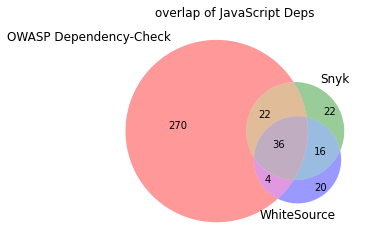

In [56]:
v= venn3(l, set_labels=tools)
plt.title('overlap of JavaScript Deps')
plt.savefig('javadeps.png')